Cleaning merged league data from FBref:

In [76]:
# Import libraries:
import pandas as pd
import os
import seaborn as so
import matplotlib.pyplot as plt

Global variables and functions:

In [77]:
# Global variables:
repo_dir = os.getcwd()  # Directory of the script
merged_data_dir = os.path.join(repo_dir, "Merged Data")   # Path to the Merged Data folder
league_ids = ['ENG-Premier League', 'ESP-La Liga', 'FRA-Ligue 1', 'GER-Bundesliga', 'ITA-Serie A'] # For league-level iteration
epl_file_path = os.path.join(merged_data_dir, "ENG-Premier League_full_merge.xlsx") # For testing EPL data only

# Graph output styling from matplotlib:
plt.style.use('fivethirtyeight')

In [108]:
# Function that imports data from Github data folder:
def import_merged_data(file_path):
    df = pd.read_excel(file_path)
    return df


# Function that removes unnamed columns:
def remove_unnamed_cols(df):

    # Create list of unnamed columns:
    columns = df.columns
    unnamed_cols = [col for col in columns if "Unnamed" in col]

    # Create a new df and set index:
    new_df = (df
              .drop(columns=unnamed_cols)
              .set_index('league')
              )

    return new_df


# Function that writes the output data to an Excel file:
def make_xl(path, df, file_name):
    file_path = os.path.join(path, f'{file_name}.xlsx')
    return df.to_excel(file_path, index=True)           # Remove index=True if getting permission error


# Function that generates a dataframe with team-level statistics filtered by position and season:
def key_stats_table(df, stat_dict, pos, season):
    return (df[df['position'].str.contains(pos) & (df['season'] == season)]
              .groupby('team')
              .aggregate(stat_dict)
              .reset_index()
              )
    

Import EPL data for preliminary cleaning and exploring:

In [79]:
# Import the EPL data for experimental cleaning:
epl_df = import_merged_data(epl_file_path)

In [80]:
# Make a local copy of the dataframe for efficiency:
epl_df_copy = epl_df.copy(deep=True)

In [107]:
# Remove all unnamed columns and drop NaN values from the dataframe:
clean_epl_df_copy = remove_unnamed_cols(epl_df_copy).dropna(subset=['position'])
clean_epl_df_copy

,season,team,player,nationality,position,age,YOB,MP,Starts,Min,...,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1
league,,,,,,,,,,,,,,,,,,,,,
ENG-Premier League,1718,Arsenal,Aaron Ramsey,WAL,MF,26.0,1990.0,24.0,21.0,1846.0,...,42.0,25.0,17.0,0.83,0.49,42.8,23.0,19.8,0.97,0.93
ENG-Premier League,1718,Arsenal,Ainsley Maitland-Niles,ENG,"DF,MF",19.0,1997.0,15.0,8.0,914.0,...,17.0,16.0,1.0,0.10,-0.69,14.3,14.3,0.0,0.00,-0.74
ENG-Premier League,1718,Arsenal,Alex Iwobi,NGA,"MF,FW",21.0,1996.0,26.0,22.0,1830.0,...,36.0,26.0,10.0,0.49,-0.24,35.6,25.5,10.2,0.50,-0.08
ENG-Premier League,1718,Arsenal,Alex Oxlade-Chamberlain,ENG,DF,23.0,1993.0,3.0,3.0,241.0,...,4.0,7.0,-3.0,-1.12,-1.86,4.2,4.6,-0.4,-0.14,-0.74
ENG-Premier League,1718,Arsenal,Alexandre Lacazette,FRA,FW,26.0,1991.0,32.0,26.0,2202.0,...,51.0,28.0,23.0,0.94,0.94,46.9,27.4,19.5,0.80,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENG-Premier League,2223,Wolves,Rayan Aït Nouri,ALG,DF,21.0,2001.0,21.0,9.0,1076.0,...,8.0,18.0,-10.0,-0.84,-0.18,11.6,18.7,-7.1,-0.60,0.01
ENG-Premier League,2223,Wolves,Raúl Jiménez,MEX,FW,31.0,1991.0,15.0,8.0,846.0,...,7.0,18.0,-11.0,-1.17,-0.61,10.6,16.6,-6.0,-0.64,-0.04
ENG-Premier League,2223,Wolves,Rúben Neves,POR,MF,25.0,1997.0,35.0,33.0,3019.0,...,26.0,48.0,-22.0,-0.66,0.47,32.5,51.7,-19.2,-0.57,0.29


In [ ]:
# Get column names:
col_names = clean_epl_df_copy.columns
col_nums = [i for i in range(0, 155)]

# Create a dictionary and convert to a pandas DF:
col_names_dict = {k:v for k,v in zip(col_nums, col_names)}
columns_df = pd.DataFrame.from_dict(col_names_dict, orient='index')

# Send to an XL doc for reference:
make_xl(path=repo_dir, df=columns_df, file_name='Merged Data Columns')

In [ ]:
# Aggregate by position and get row totals:
pos_agg_eply_df = (clean_epl_df_copy
               .groupby('position')
               .aggregate({'season': 'count', 'age': 'mean', 'MP': 'mean'})
               .rename(columns={'season': 'row_total'})
               .reset_index()
               )

pos_agg_eply_df

In [ ]:
season_agg_eply_df = (clean_epl_df_copy
                      .groupby('season')
                      .aggregate({'position': 'count', 'age': 'mean', 'MP': 'mean'})
                      .rename(columns={'position': 'row_total'})
                      .reset_index()
                      )

# Create a line chart of player count by season:
so.barplot(x='season', y='row_total', data=season_agg_eply_df)

In [ ]:
# Filter on position level:
midfield_epl_df = (clean_epl_df_copy[clean_epl_df_copy['position'].str.contains("MF")]
                   .groupby('position')
                   .aggregate({'season': 'count', 'age': 'mean', 'MP': 'mean'})
                   .rename(columns={'season': 'row_total'})
                   .reset_index()
                   )
midfield_epl_df

In [ ]:
# Plot row totals by MIDFIELD sub-positions:
plt.figure(figsize=(9,5))
so.barplot(x='position', y='row_total', data=midfield_epl_df, color='darkcyan')
plt.xlabel('Midfield Sub-Position')
plt.ylabel('Number of Players')

Aggregate at the team-position level:

<AxesSubplot: xlabel='Gls', ylabel='team'>

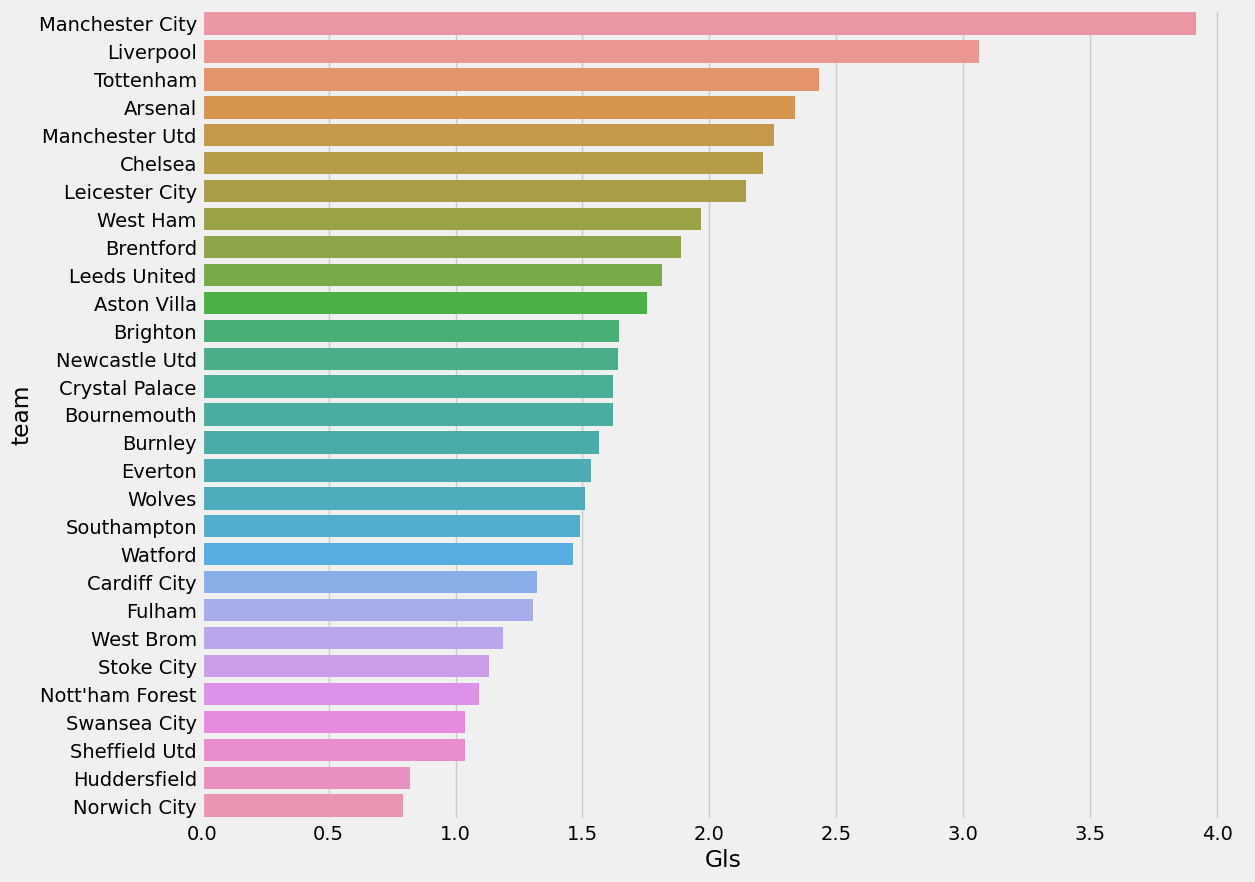

In [97]:
# Aggregate on the team-position level:
team_agg_eply_df = (clean_epl_df_copy
                      .reset_index()
                      .groupby('team')
                      .aggregate({'league': 'count', 'age': 'mean', 'Gls': 'mean', 'SoT%': 'mean', 'SCA90' : 'mean'})
                      .rename(columns={'league': 'row_total'})
                      .reset_index()
                      .sort_values(by='Gls', ascending=False)
                      )

# Horizontal barplot of average goals/player by team:
plt.figure(figsize=(12,10))
so.barplot(x='Gls', y='team', data=team_agg_eply_df)

In [112]:
# Create a dictionary of key statistics and their respective aggregation methods:
test_stat_dict = {'age': 'mean',
                  'Gls.1': 'mean',  # goals/90
                  'Cmp%.1': 'mean', # medium pass completion rate
                  'SoT%': 'mean',   # shot-on-target %
                  'SCA90' : 'mean', # shot-creating actions per 90 
                  'Tkl%': 'mean',   # successful tackle %
                  'Succ%': 'mean'   # successful take-on %
                  }

# Create a dataframe of these statistics for a certain league, position, and season:
test_df = key_stats_table(clean_epl_df_copy, test_stat_dict, 'MF', 2122)
test_df

,team,age,Gls.1,Cmp%.1,SoT%,SCA90,Tkl%,Succ%
0,Arsenal,23.700000,0.158000,87.960000,29.140000,3.462000,43.110000,53.660000
1,Aston Villa,23.384615,0.096923,86.700000,22.941667,2.249231,46.450000,55.041667
2,Brentford,23.545455,0.056364,82.440000,26.044444,2.218182,41.400000,62.055556
3,Brighton,23.600000,0.086000,84.857143,29.153846,1.946667,33.084615,47.830769
4,Burnley,28.625000,0.086250,80.312500,23.575000,1.861250,36.337500,51.500000
5,Chelsea,25.250000,0.236667,89.608333,35.483333,3.839167,33.591667,59.366667
6,Crystal Palace,25.300000,0.075000,88.390000,20.687500,2.241000,40.100000,58.560000
7,Everton,24.882353,0.074706,82.013333,22.638462,1.591176,38.271429,44.606667
8,Leeds United,23.095238,0.068571,84.880952,22.105556,2.249524,43.389474,53.283333
9,Leicester City,23.818182,0.156364,88.072727,38.540000,2.188182,36.840000,68.081818


Loop over the Merged Data folder to get all five seasons cleaned and into pandas: 

In [110]:
# Make a list of imported dataframes:
league_df_list = [import_merged_data(os.path.join(merged_data_dir, f"{league}_full_merge.xlsx")) for league in league_ids]

# Make a list of clean, copied dataframes:
cleaned_league_df_list = [remove_unnamed_cols((league_df.copy(deep=True))).dropna(subset=['position']) for league_df in league_df_list]

In [114]:
# Create a midfielder summary statistics table for each league in the 22/23 season:
mid_2223_stat_df_list = [key_stats_table(clean_league_df, test_stat_dict, 'MF', 2223) for clean_league_df in cleaned_league_df_list]

# Output the desired result:
mid_2223_stat_df_list[1]

,team,age,Gls.1,Cmp%.1,SoT%,SCA90,Tkl%,Succ%
0,Almería,26.076923,0.173077,83.492308,41.807692,3.659231,39.575000,52.008333
1,Athletic Club,26.700000,0.065000,86.930000,16.890000,4.096000,38.680000,60.710000
2,Atlético Madrid,26.428571,0.165000,89.807143,36.278571,2.737143,43.278571,55.946154
3,Barcelona,23.100000,0.110000,92.240000,27.177778,2.608000,40.977778,50.500000
4,Betis,29.000000,0.085000,90.710000,33.633333,3.539000,36.900000,47.240000
5,Celta Vigo,23.714286,0.092143,84.121429,26.845455,1.941429,39.190909,47.453846
6,Cádiz,26.222222,0.055556,85.241176,29.071429,1.970000,42.493333,41.173333
7,Elche,25.750000,0.066000,87.236842,32.752941,2.028500,37.944444,40.773684
8,Espanyol,24.388889,0.102222,83.370588,34.442857,1.873889,50.668750,36.493333
9,Getafe,26.916667,0.050833,81.558333,23.033333,2.114167,37.358333,52.316667
